<a href="https://colab.research.google.com/github/amyDing629/AI-ML-DL/blob/main/Gaussian%20and%20Gradient%20Magnitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-python
import cv2
import math
from PIL import Image

In [ ]:
# step 1 - Gaussian Blurring
def gkern(x, y, sig):
    """
    This function creates a guassian 2D filter.
    :param x: width
    :param y: length
    :param sig: scale sigma
    :return: 2D gaussian matrix
    """
    # create separate filters
    list_x = np.linspace(-(x-1)/2, (x-1)/2, x)
    list_y = np.linspace(-(y-1)/2, (y-1)/2, y)
    gauss_x = np.exp(-np.square(list_x) / np.square(sig)) * (1/((2*math.pi)**0.5)*sig)
    gauss_y = np.exp(-np.square(list_y) / np.square(sig)) * (1/((2*math.pi)**0.5)*sig)
    # create combined filter
    gauss = np.outer(gauss_x, gauss_y)
    return gauss / np.sum(gauss)

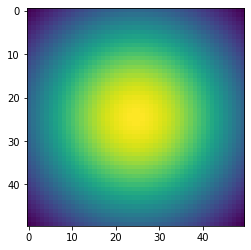

In [ ]:
plt.imshow(gkern(50, 50, 30))

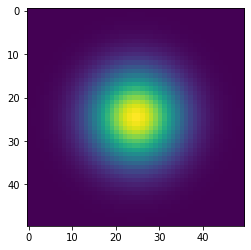

In [ ]:
plt.imshow(gkern(50, 50, 10))

In [ ]:
#Step 2: Gradient Magnitude
def _convolve(image, kernel):
    """
    This function does convolution to the image based on the input kernal.
    :return: convolution output
    """
    # flip the kernel
    kernel_flip = np.fliplr(np.flipud(kernel))
    # intialize output image
    convolution_output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = np.array(image)

    # Loop over every pixel of the image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            # element-wise multiplication of the kernel and the image
            convolution_output[x, y] = (kernel * image_padded[x: x+3, y: y+3]).sum()
    return convolution_output

def sobel_convolution(I):
    """
    This function receives an image f(x,y) 
    and returns its gradient g(x,y) using the Sobel Operator.
    """
    image_grey = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_x = _convolve(image_grey, kernel_x)
    sobel_y = _convolve(image_grey, kernel_y)
    output = (abs(sobel_x**1) + abs(sobel_y**1))**0.5
    return output

In [ ]:
I = cv2.imread("/content/drive/My Drive/window.jpg")

result = sobel_convolution(I)
result

array([[15.09966887, 14.89966443, 14.89966443, ..., 15.87450787,
         2.82842712,  2.        ],
       [15.09966887, 15.3622915 , 15.62049935, ...,  2.82842712,
         4.        ,  2.        ],
       [15.55634919, 15.93737745,  2.        , ...,  3.46410162,
         4.24264069,  2.        ],
       ...,
       [12.9614814 , 14.07124728, 15.8113883 , ..., 15.8113883 ,
        14.89966443, 14.        ],
       [11.40175425, 11.04536102, 15.16575089, ..., 15.68438714,
        15.49193338, 14.89966443],
       [13.6381817 , 15.93737745, 11.91637529, ..., 14.4222051 ,
        14.49137675,  8.36660027]])

In [ ]:
#Step3: Threshold Algorithm
def threshold_image(img):
    """
    This function implements threshold algorithm and outputs a balck and white edge-mapped image.
    Sobel convolustion step is included here.
    """
    gradient_magnitude = sobel_convolution(img)
    threshold = 0
    # initial threshold
    new_threshold = np.sum(gradient_magnitude)/(img.shape[0]*img.shape[1])
    i = 0

    # Jumping out of the loop if threshold value stops to change.
    while threshold != new_threshold:
        lower_class = []
        upper_class = []
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                # categorize pixels into two classes
                if gradient_magnitude[x, y] < new_threshold:
                    lower_class.append(gradient_magnitude[x, y])
                else:
                    upper_class.append(gradient_magnitude[x, y])
        # compute average gradient magnitude
        mL = sum(lower_class)/len(lower_class)
        mH = sum(upper_class)/len(upper_class)
        # update treshold and new_treshold values
        threshold = new_threshold
        new_threshold = (mL + mH)/2
        i += 1
    
    # initualize output image
    edge_mapped_img = np.empty((img.shape[0], img.shape[1]))
    # assign white/balck to pixels based on the threshold
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if gradient_magnitude[x, y] < new_threshold:
                edge_mapped_img[x, y] = 0
            else:
                edge_mapped_img[x, y] = 255
  
    return edge_mapped_img
    

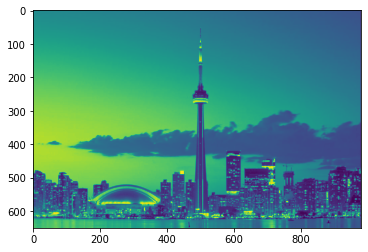

In [ ]:
I = cv2.imread("/content/drive/My Drive/image1.jpg")
image_grey = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(image_grey)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


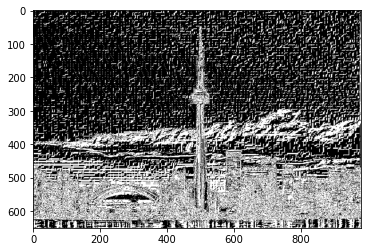

In [ ]:
image_matrix = threshold_image(I)
plt.imshow(cv2.cvtColor(np.float32(image_matrix), cv2.COLOR_BGR2RGB))
plt.show()

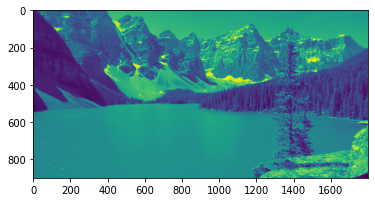

In [ ]:
I = cv2.imread("/content/drive/My Drive/image2.jpg")
image_grey = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(image_grey)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


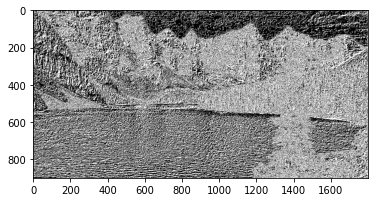

In [ ]:
image_matrix = threshold_image(I)
plt.imshow(cv2.cvtColor(np.float32(image_matrix), cv2.COLOR_BGR2RGB))
plt.show()

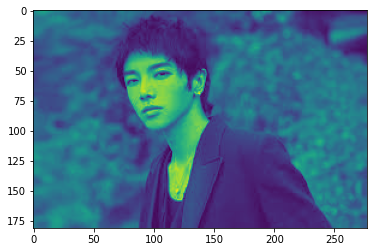

In [ ]:
I = cv2.imread("/content/drive/My Drive/image3.jpg")
image_grey = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(image_grey)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


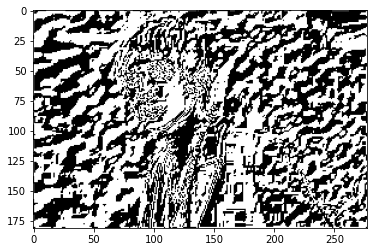

In [ ]:
image_matrix = threshold_image(I)
plt.imshow(cv2.cvtColor(np.float32(image_matrix), cv2.COLOR_BGR2RGB))
plt.show()